<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/intro/colab_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to colab

This notebook illustrates how to install the PML code and various other libraries. More details in the [official documentation](https://colab.research.google.com/notebooks/intro.ipynb) and the [official introduction](https://colab.research.google.com/notebooks/basic_features_overview.ipynb).

**Make sure you select 'GPU' from the 'Runtime' tab at the top of this page.**

# How to import standard libraries

Colab comes with most of the packages we need pre-installed. 
To install new packages, use the following (see [this page](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb) for details):

```
!pip install foo
```

To avoid installing packages  every time you open a colab,
 you can use this trick:

https://stackoverflow.com/questions/55253498/how-do-i-install-a-library-permanently-in-colab


In [1]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import glob

## Numpy

In [2]:
import numpy as np
np.set_printoptions(precision=3)

## Pandas

In [ ]:
import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows



## Sklearn

In [ ]:
import sklearn

## Plotting

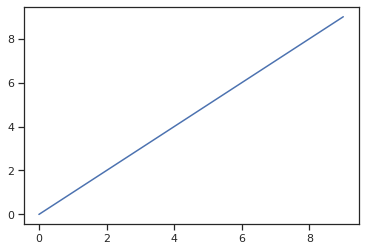

In [ ]:
import matplotlib.pyplot as plt
import PIL
import imageio
import seaborn as sns;
sns.set(style="ticks", color_codes=True)

from IPython import display

# Check we can plot stuff
plt.figure()
plt.plot(range(10))

## JAX

In [ ]:
# JAX (https://github.com/google/jax)

import jax
import jax.numpy as jnp
A = jnp.zeros((3,3))

## Tensorflow

In [ ]:

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

print("tf version {}".format(tf.__version__))
print([d for d in tf.config.list_physical_devices()])

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. DNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

tf version 2.4.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## PyTorch

In [ ]:
# Pytorch
import torch
import torchvision
print("torch version {}".format(torch.__version__))
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("Torch cannot find GPU")

torch version 1.7.0+cu101
Tesla T4


## PML

In [ ]:
# PyProbML files (data, scripts, etc)
!rm -rf pyprobml # Run this first if the pyprobml directory already exists
!git clone https://github.com/probml/pyprobml


Cloning into 'pyprobml'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 4747 (delta 84), reused 66 (delta 24), pack-reused 4577
Receiving objects: 100% (4747/4747), 201.89 MiB | 31.42 MiB/s, done.
Resolving deltas: 100% (2587/2587), done.


In [ ]:
# Check we can access scripts and any functions they define
os.chdir('pyprobml/scripts')
import pyprobml_utils as pml
pml.pyprobml_test()


welcome to python probabilistic ML library


In [ ]:

# Check we can read a datafile (we assume we have chdir to inside scripts dir)
!ls '../data'
datadir = '../data'
import re
fname = os.path.join(datadir, 'timemachine.txt')
with open(fname, 'r') as f:
    lines = f.readlines()
    sentences = [re.sub('[^A-Za-z]+', ' ', st).lower().split()
                   for st in lines]
for  i in range(5):
  words = sentences[i]
  print(words)

20news_w100.mat        goog.npy       sachsCtsHTF.txt
bread.jpg	       heightWeight   sat
CelebA		       knnClassify3c  SP500.csv
clown.png	       moteData       timemachine.txt
collegeAdmissions.csv  mpg.csv	      XwindowsDocData.mat
CRX_REF_R1_8mers.txt   prostate
['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
['i']
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and', 'twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the', 'fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the', 'lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our', 'glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and', 'caressed', 'us', 'rather', 'than', 'submitted', 'to', 'be', 'sat', 'upon',

# Avoiding problems with global state

One of the main drawbacks of colab is that all variables are globally visible,
so you may accidently write a function that depends on the current statet of the notebook, but which is not passed in as an argument. Such a function may fail if used in a different context. The [localscope](https://localscope.readthedocs.io/en/latest/README.html) package can catch some of these errors.
(See also this [provocative and amusing set of slides by Joel Grus about why notebooks are bad](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/edit).)



In [3]:
!pip install localscope


  Created wheel for localscope: filename=localscope-0.1.3-cp36-none-any.whl size=4068 sha256=7a5d6718e16dbff82fe94e1229d233a19ef52280ff0d4fc48ef62a2ba41d5855
  Stored in directory: /root/.cache/pip/wheels/89/57/33/ce153d31de05d74323324df0f45a08ea99e92300e549da5154
Successfully built localscope


In [7]:
from localscope import localscope

In [4]:
a = 'hello world'
def myfun():
   print(a) # silently accesses global variable

myfun()

hello world


In [8]:
a = 'hello world'
@localscope
def myfun():
  print(a)

myfun()

ValueError: ignored

In [9]:
def myfun2():
  return 42

@localscope
def myfun3():
  return myfun2()

  

ValueError: ignored

In [10]:
@localscope.mfc # allow for global methods, functions, classes
def myfun3():
  return myfun2()
